In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv('spam_assassin.csv', encoding='latin-1')

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    text = [ps.stem(word) for word in text if word not in stop_words]
    return ' '.join(text)

data['text'] = data['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text']).toarray()
y = data['target'].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [7]:
yPred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, yPred)}")
print(classification_report(y_test, yPred, target_names=['Ham', 'Spam']))

Accuracy: 0.9853448275862069
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       779
        Spam       1.00      0.96      0.98       381

    accuracy                           0.99      1160
   macro avg       0.99      0.98      0.98      1160
weighted avg       0.99      0.99      0.99      1160



In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example email text
new_email = ["MIME-Version: 1.0 Content-Type: text/plain; charset=us-ascii Content-Disposition: inline User-Agent: Mutt/1.2.5i In-Reply-To: <0D443C91DCE9CD40B1C795BA222A729E018854FA@milexc01.maxtor.com>; from conor_wynne@maxtor.com on Fri, Jul 26, 2002 at 03:56:22PM +0100 Sender: ilug-admin@linux.ie Errors-To: ilug-admin@linux.ie X-Mailman-Version: 1.1 Precedence: bulk List-Id: Irish Linux Users' Group <ilug.linux.ie> X-Beenthere: ilug@linux.ie On Fri, Jul 26, 2002 at 03:56:22PM +0100 or so it is rumoured hereabouts"]

# Step 1: Preprocess the new email (using the same TF-IDF vectorizer fitted on training data)
new_email_tfidf = vectorizer.transform(new_email).toarray()  # 'vectorizer' is the trained TF-IDF vectorizer

# Step 2: Predict if it's spam or ham using the trained model
prediction = model.predict(new_email_tfidf)

# Step 3: Display the result
if prediction[0] == 1:
    print("This email is spam.")
else:
    print("This email is ham (not spam).")

This email is ham (not spam).


In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv('spam_assassin.csv', encoding='latin-1')

# Filter spam emails
spam_emails = data[data['target'] == 1] 

# Return spam emails
print(spam_emails)

                                                   text  target
1     From gort44@excite.com Mon Jun 24 17:54:21 200...       1
2     From fork-admin@xent.com Mon Jul 29 11:39:57 2...       1
3     From dcm123@btamail.net.cn Mon Jun 24 17:49:23...       1
5     From tobaccodemon@terra.es Sat Sep 7 22:05:58 ...       1
6     From larlar78@MailOps.Com Sat Jun 30 00:19:08 ...       1
...                                                 ...     ...
5785  From simply-amateur-zzzz=spamassassin.taint.or...       1
5787  From gina3@freemail.nl Tue Aug 6 11:04:43 2002...       1
5789  From sathar@amtelsa.com Mon Jun 24 17:40:14 20...       1
5790  From crackmice-admin@crackmice.com Thu Sep 26 ...       1
5793  Received: from hq.pro-ns.net (localhost [127.0...       1

[1896 rows x 2 columns]


In [10]:
import joblib

joblib.dump(model, 'spam_detector_model.pkl')

['spam_detector_model.pkl']

In [11]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load('spam_detector_model.pkl')  # Load trained model

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    email_text = data['emailText']
    
    # Preprocess the email text
    vectorized_email = vectorizer.transform([email_text])  # Using the trained vectorizer

    # Make prediction
    prediction = model.predict(vectorized_email)
    result = 'ham' if prediction[0] == 0 else 'spam'
    
    return jsonify(result=result)

if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [12]:
# Calculate the percentage of spam emails
spam_count = data['target'].sum()  # Assuming 'label' is 1 for spam and 0 for ham
total_emails = len(data)
spam_percentage = (spam_count / total_emails) * 100

print(f"Percentage of spam emails: {spam_percentage:.2f}%")

Percentage of spam emails: 32.71%


                                                text  target
0  From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...       0
1  From gort44@excite.com Mon Jun 24 17:54:21 200...       1
2  From fork-admin@xent.com Mon Jul 29 11:39:57 2...       1
3  From dcm123@btamail.net.cn Mon Jun 24 17:49:23...       1
4  From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...       0


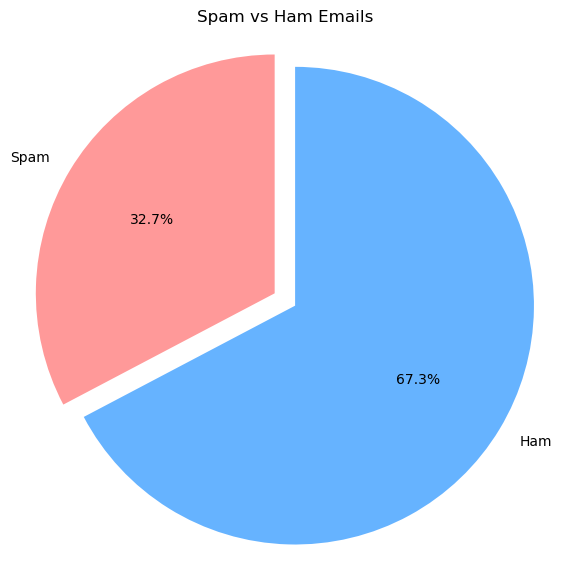

C:\Users\Admin\AppData\Local\Temp\ipykernel_19856\1359421406.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=email_types, y=counts, palette=['#ff9999','#66b3ff'])


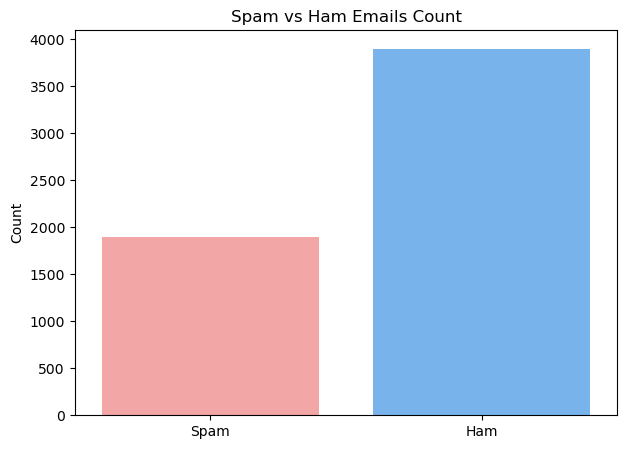

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('spam_assassin.csv', encoding='latin-1')

# Check the structure of the dataset
print(data.head())

# Replace 'label' with your actual column name if necessary
# Assuming 'label' is 1 for spam and 0 for ham
spam_count = data['target'].sum()
ham_count = len(data) - spam_count

# Create a pie chart
labels = ['Spam', 'Ham']
sizes = [spam_count, ham_count]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.1, 0))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Spam vs Ham Emails')
plt.show()

# Create a bar plot
email_types = ['Spam', 'Ham']
counts = [spam_count, ham_count]

plt.figure(figsize=(7,5))
sns.barplot(x=email_types, y=counts, palette=['#ff9999','#66b3ff'])
plt.title('Spam vs Ham Emails Count')
plt.ylabel('Count')
plt.show()
